<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Project:-Creating-an-optimal-trading-strategy-using-DRL" data-toc-modified-id="Project:-Creating-an-optimal-trading-strategy-using-DRL-1">Project: Creating an optimal trading strategy using DRL</a></span></li><li><span><a href="#Do-this-first" data-toc-modified-id="Do-this-first-2">Do this first</a></span></li><li><span><a href="#Module-0:-State-Representation-and-Action-Space-Design" data-toc-modified-id="Module-0:-State-Representation-and-Action-Space-Design-3">Module 0: State Representation and Action Space Design</a></span></li><li><span><a href="#Module-1:-Trading-as-a-Markov-Decision-Process" data-toc-modified-id="Module-1:-Trading-as-a-Markov-Decision-Process-4">Module 1: Trading as a Markov Decision Process</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#-Parameters-" data-toc-modified-id="-Parameters--4.0.0.1"> Parameters </a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Module-2.1:-Market-Data-Collection-and-Preparation" data-toc-modified-id="Module-2.1:-Market-Data-Collection-and-Preparation-5">Module 2.1: Market Data Collection and Preparation</a></span></li><li><span><a href="#Module-2.2:-Benchmark-Policy-Design" data-toc-modified-id="Module-2.2:-Benchmark-Policy-Design-6">Module 2.2: Benchmark Policy Design</a></span></li><li><span><a href="#Module-3.1:-RL-Algorithms-Assessment" data-toc-modified-id="Module-3.1:-RL-Algorithms-Assessment-7">Module 3.1: RL Algorithms Assessment</a></span></li><li><span><a href="#Module-3.2:-DRL-Algorithm-Selection-and-Implementation" data-toc-modified-id="Module-3.2:-DRL-Algorithm-Selection-and-Implementation-8">Module 3.2: DRL Algorithm Selection and Implementation</a></span></li><li><span><a href="#Module-4:-Reward-Function-Design-and-Agent-Training" data-toc-modified-id="Module-4:-Reward-Function-Design-and-Agent-Training-9">Module 4: Reward Function Design and Agent Training</a></span></li><li><span><a href="#Module-5:-Agent-Evaluation-and-Refinement" data-toc-modified-id="Module-5:-Agent-Evaluation-and-Refinement-10">Module 5: Agent Evaluation and Refinement</a></span></li><li><span><a href="#Module-6:-Trading-Strategy-Analysis-and-Interpretation" data-toc-modified-id="Module-6:-Trading-Strategy-Analysis-and-Interpretation-11">Module 6: Trading Strategy Analysis and Interpretation</a></span></li><li><span><a href="#Module-7:-Reflection-and-key-findings" data-toc-modified-id="Module-7:-Reflection-and-key-findings-12">Module 7: Reflection and key findings</a></span></li><li><span><a href="#Module-8:-Bonus" data-toc-modified-id="Module-8:-Bonus-13">Module 8: Bonus</a></span></li><li><span><a href="#Author-contribution-statement" data-toc-modified-id="Author-contribution-statement-14">Author contribution statement</a></span><ul class="toc-item"><li><span><a href="#Example-author-contribution-statement:" data-toc-modified-id="Example-author-contribution-statement:-14.1">Example author contribution statement:</a></span></li></ul></li><li><span><a href="#AI-statement" data-toc-modified-id="AI-statement-15">AI statement</a></span><ul class="toc-item"><li><span><a href="#Example-of-AI-statement:" data-toc-modified-id="Example-of-AI-statement:-15.1">Example of AI statement:</a></span></li></ul></li></ul></div>

# Project: Creating an optimal trading strategy using DRL
*Course year 2023-2024*

Welcome to the Algorithmic Trading Adventure! This notebook provides a starting point for the RL project in finance. The problem  focuses on the challenges of learning policies in sequential continuous optimization problems, learning to base decisions on real data. You may simplify or alter aspects of the original problem to make it suit your project. You will apply the knowledge you have gained throughout this course to design, implement, and evaluate a DRL agent that trades a portfolio of assets in a realistic market simulation.

Your quest is to create a DRL trading agent that maximizes return and manages risk in a simulated market environment. You will develop the agent from scratch, following a step-by-step process that mirrors the stages of creating a real-world DRL trading system. 
With reinforcement learning, you can learn the impact of trading decisions made today on rewards tomorrow. 
In this project, you will tackle the three curses of dimensionality for a typical finance problem, enabling to solve large sequential decision-problems within reasonable time.

Some things to keep in mind while working through this project:
* Please have a look at the tutorial ('Reinforcement Learning Tutorial Algorithmic Trading') in parallel with this project, and check the source code provided in 'Reinforcement Learning Coding Tutorial)'.
* Ensure to write an independently readable report. Hints, assignments etc. can be removed or replaced with your own text and documentation. Both code and report should look clear and consistent.
* Pay attention to aspects such as assumptions, motivation, explanation and validation.
* While coding, make use of print statements, assertions and test conditions

**[Insert group number and names of group members]**<br>
**Group name**<br>
**Member 1 (s000000)**<br>
**Member 2 (s000000)**<br>
**Member 3 (s000000)**<br>

<p align="center">
<img src="https://projectnile.in/wp-content/uploads/2022/01/Algorithmic-Trading.jpeg" alt="Algorithmic trading" style="width:70%; border:0;">
</p>

Content:<br>
[A Primer on Deep Reinforcement Learning for Finance (Osterrieder, 2023)](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=4316650)<br>
[Deep reinforcement learning on a multi-asset environment for trading
(Hirsa et al., 2021)](https://arxiv.org/abs/2106.08437)<br>

Working with Jupyter Notebook:<br>
[Introduction to Jupyter Notebook](https://www.dataquest.io/blog/jupyter-notebook-tutorial/)<br>
[UT JupyterLab wiki](https://jupyter.wiki.utwente.nl/)<br>
[Markdown language](https://learn.microsoft.com/en-us/azure/devops/project/wiki/markdown-guidance?view=azure-devops)<br>
[LaTeX mathematics](https://en.wikibooks.org/wiki/LaTeX/Mathematics)<br>

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for visualizations
sns.set(style="darkgrid")

# Enable inline plotting for matplotlib
%matplotlib inline

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

print("Environment setup complete!")

Environment setup complete!


# Do this first
Please go through the Reinforcement Learning Coding Tutorial first. For every module, you might find the relevant code there, in particular in the section on Reinforcement Learning for Trading with Q Network

# Module 0: State Representation and Action Space Design

Design a state representation and action space for your DRL trading agent. Consider the types of assets, the agent's trading objectives, and the market factors that might influence its decisions. Ensure that the chosen state and action spaces are suitable for the DRL algorithm you will use. 

- **state[0]: Current Price of an Asset**
  - This value represents the most recent trading price of a specific asset. It is crucial for making immediate buy or sell decisions.

- **state[1]: Highest Price of the Asset in the Last Period**
  - Monitoring the highest price within a specific time frame helps in assessing volatility and potential price ceilings.

- **state[2]: Moving Average of the Asset Price**
  - The moving average smooths out price data by creating a constantly updated average price, which is beneficial for identifying trends.

- **state[3]: Volume of the Asset Being Traded**
  - Trading volume indicates the total quantity of an asset that was traded in a given time period and is a measure of the asset's liquidity, often used to confirm trends or signals derived from price movements.
  
- actions: buy, sell hold

In [22]:
import torch
print(f"CUDA available: {torch.cuda.is_available()}")
print(f"CUDA device count: {torch.cuda.device_count()}")
print(f"Current CUDA device: {torch.cuda.current_device()}")
print(f"Device name: {torch.cuda.get_device_name(0)}")

CUDA available: True
CUDA device count: 2
Current CUDA device: 0
Device name: Tesla T4


# Module 1: Trading as a Markov Decision Process
The first step of tackling the problem is to mathematically define the problem as a Markov Decision Process. Ensure to be precise and consistent in your formulations, as the mathematical framework forms the basis for both your implementation and communicating the problem with others. 

Here, create a very simple MDP, with some basic states, actions, rewards and an example transition function for the stock price process. Note: You need a model of how the stock price evolves over time and what the stock price in the period is. You can e.g. use next_price = current_price * np.random.normal(1, 0.01).
    
Include the following elements in the MDP:
* <b>State</b> (information needed for determining (i) action, (ii) reward, (iii) transition)
* <b>Action</b></b> (inc. constraints that filter out infeasible actions), 
* <b>Reward</b> function (direct reward/cost corresponding to state-action pair)
* <b>Transition</b> function (deterministic transition to post-decision state, stochastic transition to next state. Some simplifications for the latter are allowed in case of complicated transitions). Specifically, the following is expected:
    *  <b>Deterministic</b>: The deterministic part of the transition (from pre-decision state to post-decision state, based on the action), should be explicit. Later in the project, the post-decision state will be used to design features.
    *  <b>Stochastic</b>: If not reasonably possible (e.g., when requiring advanced combinatorics), the stochastic part of the transition (describing exogenous outcomes) may be simplified. Note that for the RL algorithms, we do not need to know the probability of each scenario (i.e., each vector permutation), as we simply sample random numbers.
    *  <b>Transition matrix</b>: For running the value iteration algorithm, it is advisable to run a toy problem with a manually inserted transition matrix. Here, you can use a very simplistic example, e.g. just 2 possible stock prices with random transitions.
* Also add a (discounted) objective function
    * Reflect on the role of the discount rate in this problem setting
    * You may choose for a finite or infinite horizon variant. The infinite variant might be slightly easier to work with (why?).

You can use LaTeX comments to write out the mathematics, e.g.,

<h4> Parameters </h4>
\begin{equation}
   \text{Decision epoch}\\
   t \in \mathcal{T} = \{0,1,\ldots,T\}
\end{equation}

In [23]:
def generate_state_data(num_steps=100, initial_price=100.0, window_size=10):
    """
    Generates synthetic state data for a trading agent.
    
    Args:
        num_steps (int): Number of time steps to simulate.
        initial_price (float): Starting price of the asset.
        window_size (int): Window for moving average calculation.
    
    Returns:
        states (np.array): Array of shape (num_steps, 4) containing state vectors.
    """
    # Initialize arrays to store price and volume data
    prices = np.zeros(num_steps)
    volumes = np.zeros(num_steps)
    states = np.zeros((num_steps, 4))  # 4 state components
    
    # Initialize first price and volume
    prices[0] = initial_price
    volumes[0] = np.random.randint(100, 1000)  # Random initial volume
    
    # Generate subsequent prices and volumes
    for t in range(1, num_steps):
        # Price follows: next_price = current_price * random normal noise
        prices[t] = prices[t-1] * np.random.normal(1.0, 0.02)  # Small drift (µ=1, σ=0.02)
        
        # Volume fluctuates randomly around a base value
        volumes[t] = max(1, volumes[t-1] * np.random.normal(1.0, 0.1))
    
    # Compute states: [current_price, highest_price, moving_avg, volume]
    for t in range(num_steps):
        # Current price
        current_price = prices[t]
        
        # Highest price in the last `window_size` steps
        lookback = max(0, t - window_size)
        highest_price = np.max(prices[lookback:t+1])
        
        # Moving average (simple) over the last `window_size` steps
        moving_avg = np.mean(prices[lookback:t+1]) if t >= window_size else current_price
        
        # Volume
        volume = volumes[t]
        
        # Store state
        states[t] = [current_price, highest_price, moving_avg, volume]
    
    return states

# Generate 100 steps of state data
states = generate_state_data(num_steps=100)
print("Generated state data (first 5 steps):")
print(len(states))


Generated state data (first 5 steps):
100


In [21]:
import torch

states=torch.FloatTensor(states)

print(states.unsqueeze(0).shape)

torch.Size([1, 100, 4])


In [24]:
actions = {0: 'Buy', 1: 'Sell', 2: 'Hold'}

In [25]:
def state_transition_with_action(state, action):
    price, high, ma, volume, cash, holdings = state
    
    # 1. Market dynamics
    next_price = price * np.random.normal(1.0, 0.02)
    next_volume = volume * np.random.normal(1.0, 0.1)
    
    # 2. Apply action
    trade_size = 0.1  # 10% of cash/holdings
    if action == 1:  # Buy
        cost = trade_size * cash
        new_holdings = holdings + (cost / price)
        new_cash = cash - cost
    elif action == 2:  # Sell
        sold = trade_size * holdings
        new_cash = cash + (sold * price)
        new_holdings = holdings - sold
    else:  # Hold
        new_cash, new_holdings = cash, holdings
    
    # 3. Update market features
    next_high = max(next_price, high)
    next_ma = (ma * 9 + next_price) / 10  # SMA window=10
    
    next_state = [
        next_price, next_high, next_ma, next_volume,
        new_cash, new_holdings
    ]
    
    return next_state

In [26]:
def reward_function(old_state, new_state):
    # Old portfolio value
    old_value = old_state[4] + old_state[5] * old_state[0]  # cash + holdings * price
    
    # New portfolio value
    new_value = new_state[4] + new_state[5] * new_state[0]
    
    # Reward = Profit (with transaction cost penalty)
    transaction_cost = 0.001 * abs(new_value - old_value)  # 0.1% fee
    reward = (new_value - old_value) - transaction_cost
    
    return reward

In [29]:
import torch
import torch.nn as nn
import random
from collections import deque


class DQNAgent:
    def __init__(self, state_dim, action_dim):
        self.state_dim = state_dim
        self.action_dim = action_dim
        self.memory = deque(maxlen=10000)
        self.gamma = 0.95
        self.epsilon = 1.0
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.model = self._build_model()
        
        # Check if GPU is available
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        print(f"Using device: {self.device}")
        self.model.to(self.device)  # Move model to GPU
    
    def _build_model(self):
        model = nn.Sequential(
            nn.Linear(self.state_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, self.action_dim)
        )
        return model
    
    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randint(0, self.action_dim - 1)
        
        # Convert state to tensor and move to GPU
        state_tensor = torch.FloatTensor(state).unsqueeze(0).to(self.device)
        with torch.no_grad():
            q_values = self.model(state_tensor)
        return torch.argmax(q_values).item()
    
    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))
    
    def train(self, batch_size=32):
        if len(self.memory) < batch_size:
            return
        
        batch = random.sample(self.memory, batch_size)
        states, actions, rewards, next_states, dones = zip(*batch)
        
        # Convert to tensors and move to GPU
        states = torch.FloatTensor(states).to(self.device)
        next_states = torch.FloatTensor(next_states).to(self.device)
        actions = torch.LongTensor(actions).to(self.device)
        rewards = torch.FloatTensor(rewards).to(self.device)
        dones = torch.FloatTensor(dones).to(self.device)
        
        current_q = self.model(states).gather(1, actions.unsqueeze(1))
        next_q = self.model(next_states).max(1)[0].detach()
        target_q = rewards + (1 - dones) * self.gamma * next_q
        
        loss = nn.MSELoss()(current_q.squeeze(), target_q)
        optimizer = torch.optim.Adam(self.model.parameters())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        self.epsilon = max(self.epsilon_min, self.epsilon * self.epsilon_decay)

In [31]:
# Initialize
state_dim = 6  # price, high, ma, volume, cash, holdings
action_dim = 3  # buy, sell, hold
agent = DQNAgent(state_dim, action_dim)
portfolio = {"cash": 10000, "holdings": 0}
states = generate_state_data(num_steps=1000)

# Performance tracking containers
portfolio_values = []
all_actions = []
episode_metrics = {
    'sharpe': [],
    'max_drawdown': [],
    'cumulative_return': [],
    'action_distribution': []
}

# Benchmark: Buy-and-Hold strategy
initial_price = states[0][0]
final_price = states[-1][0]
buy_and_hold_return = (final_price - initial_price) / initial_price

# Run episodes
for episode in range(100):
    state = np.concatenate([states[0], [portfolio["cash"], portfolio["holdings"]]])
    total_reward = 0
    episode_portfolio_values = []
    episode_actions = []
    
    for t in range(len(states) - 1):
        # Get action and transition
        action = agent.act(state)
        next_state_market = states[t + 1]
        next_state_full = state_transition_with_action(state, action)
        reward = reward_function(state, next_state_full)
        total_reward += reward
        
        # Track portfolio value and actions
        current_value = state[4] + state[5] * state[0]  # cash + holdings*price
        episode_portfolio_values.append(current_value)
        episode_actions.append(action)
        
        # Store experience and train
        done = (t == len(states) - 2)
        agent.remember(state, action, reward, next_state_full, done)
        agent.train()
        
        state = next_state_full
    
    # Calculate performance metrics for this episode
    returns = np.diff(episode_portfolio_values) / episode_portfolio_values[:-1]
    sharpe_ratio = np.mean(returns) / (np.std(returns) + 1e-6) * np.sqrt(252)
    max_dd = (np.maximum.accumulate(episode_portfolio_values) - episode_portfolio_values).max()
    cumulative_return = (episode_portfolio_values[-1] - episode_portfolio_values[0]) / episode_portfolio_values[0]
    
    # Get action distribution
    unique, counts = np.unique(episode_actions, return_counts=True)
    action_dist = dict(zip(unique, counts / len(episode_actions)))
    
    # Store metrics
    episode_metrics['sharpe'].append(sharpe_ratio)
    episode_metrics['max_drawdown'].append(max_dd)
    episode_metrics['cumulative_return'].append(cumulative_return)
    episode_metrics['action_distribution'].append(action_dist)
    
    # Print comprehensive report
    print(f"\nEpisode {episode} Summary:")
    print(f"  Total Reward: {total_reward:.2f}")
    print(f"  Cumulative Return: {cumulative_return:.2%} (Buy & Hold: {buy_and_hold_return:.2%})")
    print(f"  Sharpe Ratio: {sharpe_ratio:.2f}")
    print(f"  Max Drawdown: {max_dd:.2f}")
    print("  Action Distribution:")
    for act, count in action_dist.items():
        print(f"    {actions[act]}: {count:.1%}")



Using device: cuda

Episode 0 Summary:
  Total Reward: -584.78
  Cumulative Return: -5.65% (Buy & Hold: -63.79%)
  Sharpe Ratio: -0.22
  Max Drawdown: 1515.82
  Action Distribution:
    Buy: 43.5%
    Sell: 8.0%
    Hold: 48.4%

Episode 1 Summary:
  Total Reward: 867.70
  Cumulative Return: 8.73% (Buy & Hold: -63.79%)
  Sharpe Ratio: 0.40
  Max Drawdown: 889.53
  Action Distribution:
    Buy: 44.1%
    Sell: 7.9%
    Hold: 47.9%

Episode 2 Summary:
  Total Reward: 128.76
  Cumulative Return: 1.67% (Buy & Hold: -63.79%)
  Sharpe Ratio: 0.09
  Max Drawdown: 1341.59
  Action Distribution:
    Buy: 36.9%
    Sell: 14.1%
    Hold: 48.9%

Episode 3 Summary:
  Total Reward: 1657.45
  Cumulative Return: 16.76% (Buy & Hold: -63.79%)
  Sharpe Ratio: 0.72
  Max Drawdown: 995.58
  Action Distribution:
    Buy: 44.1%
    Sell: 7.3%
    Hold: 48.5%

Episode 4 Summary:
  Total Reward: -857.42
  Cumulative Return: -8.29% (Buy & Hold: -63.79%)
  Sharpe Ratio: -0.38
  Max Drawdown: 1283.68
  Action Dist

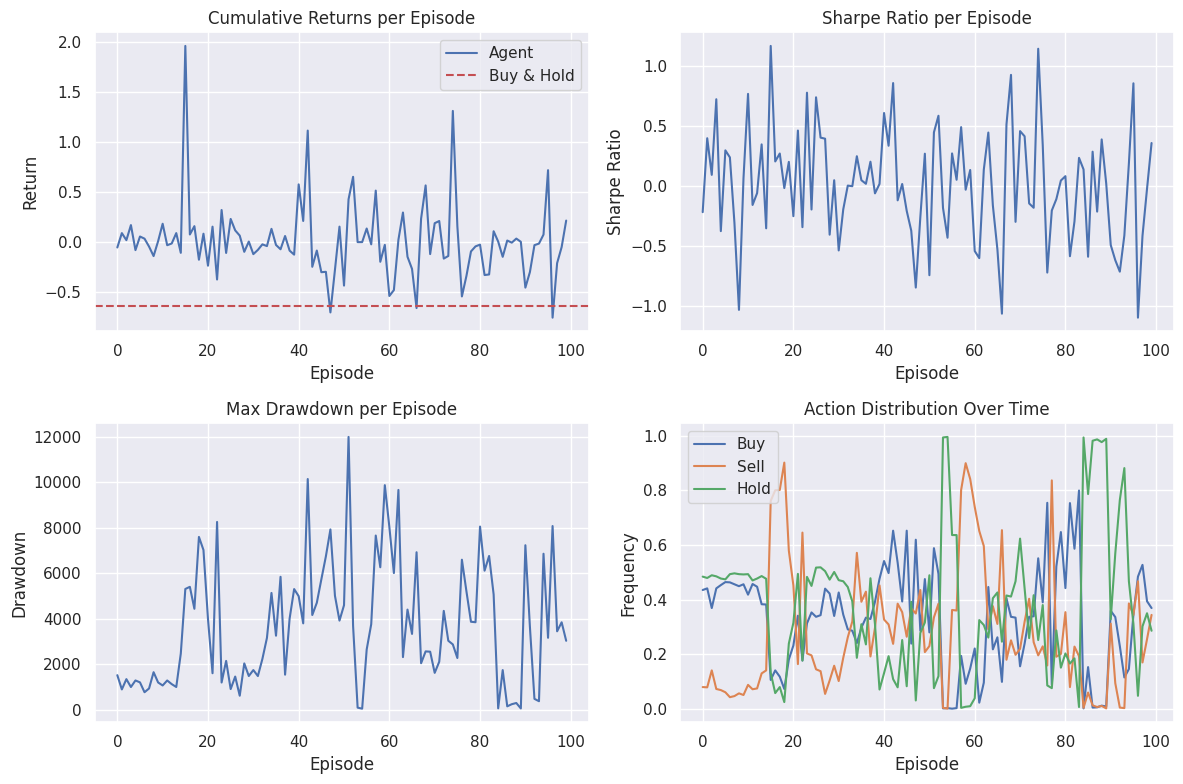

In [32]:
# Plot performance over time
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Cumulative Returns
plt.subplot(2, 2, 1)
plt.plot(episode_metrics['cumulative_return'], label='Agent')
plt.axhline(y=buy_and_hold_return, color='r', linestyle='--', label='Buy & Hold')
plt.title('Cumulative Returns per Episode')
plt.xlabel('Episode')
plt.ylabel('Return')
plt.legend()

# Sharpe Ratio
plt.subplot(2, 2, 2)
plt.plot(episode_metrics['sharpe'])
plt.title('Sharpe Ratio per Episode')
plt.xlabel('Episode')
plt.ylabel('Sharpe Ratio')

# Max Drawdown
plt.subplot(2, 2, 3)
plt.plot(episode_metrics['max_drawdown'])
plt.title('Max Drawdown per Episode')
plt.xlabel('Episode')
plt.ylabel('Drawdown')

# Action Distribution
plt.subplot(2, 2, 4)
action_counts = np.zeros((len(episode_metrics['action_distribution']), action_dim))
for i, dist in enumerate(episode_metrics['action_distribution']):
    for act, count in dist.items():
        action_counts[i, act] = count
for act in range(action_dim):
    plt.plot(action_counts[:, act], label=actions[act])
plt.title('Action Distribution Over Time')
plt.xlabel('Episode')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

def evaluate_agent(agent, test_states, initial_cash=10000):
    """
    Evaluate trained agent on unseen test data
    Returns:
        - portfolio_values: List of portfolio values over time
        - actions_taken: Sequence of actions taken
        - performance_metrics: Dictionary of calculated metrics
    """
    # Initialize
    portfolio = {"cash": initial_cash, "holdings": 0}
    state = np.concatenate([test_states[0], [portfolio["cash"], portfolio["holdings"]]])
    portfolio_values = []
    actions_taken = []
    trade_history = []
    
    # Disable exploration
    original_epsilon = agent.epsilon
    agent.epsilon = 0
    
    # Run through test data
    for t in range(len(test_states) - 1):
        # Get action (no exploration)
        action = agent.act(state)
        
        # Execute action
        next_state = state_transition_with_action(state, action)
        
        # Record portfolio value and actions
        current_value = state[4] + state[5] * state[0]  # cash + holdings*price
        portfolio_values.append(current_value)
        actions_taken.append(action)
        
        # Record trades (optional)
        if action != 2:  # Not hold
            trade_history.append({
                'step': t,
                'action': action,
                'price': state[0],
                'shares': abs(next_state[5] - state[5]),
                'value': abs(state[4] - next_state[4])
            })
        
        state = next_state
    
    # Restore original epsilon
    agent.epsilon = original_epsilon
    
    # Calculate performance metrics
    returns = np.diff(portfolio_values) / portfolio_values[:-1]
    metrics = {
        'cumulative_return': (portfolio_values[-1] - portfolio_values[0]) / portfolio_values[0],
        'annualized_return': (1 + (portfolio_values[-1] - portfolio_values[0])/portfolio_values[0])**(252/len(test_states)) - 1,
        'sharpe_ratio': np.mean(returns) / (np.std(returns) + 1e-6) * np.sqrt(252),
        'max_drawdown': (np.maximum.accumulate(portfolio_values) - portfolio_values).max(),
        'win_rate': np.mean(np.array(returns) > 0),
        'action_distribution': {
            'buy': np.mean(np.array(actions_taken) == 0),
            'sell': np.mean(np.array(actions_taken) == 1),
            'hold': np.mean(np.array(actions_taken) == 2)
        }
    }
    
    return portfolio_values, actions_taken, metrics, trade_history

def plot_performance(test_states, portfolio_values, actions_taken):
    """Visualize agent performance"""
    plt.figure(figsize=(15, 10))
    
    # Price and portfolio value
    prices = [s[0] for s in test_states[:len(portfolio_values)]]
    plt.subplot(2, 2, 1)
    plt.plot(prices, label='Asset Price', alpha=0.7)
    plt.plot(portfolio_values, label='Portfolio Value')
    plt.title('Price vs Portfolio Value')
    plt.xlabel('Time Step')
    plt.ylabel('Value')
    plt.legend()
    
    # Drawdown
    plt.subplot(2, 2, 2)
    running_max = np.maximum.accumulate(portfolio_values)
    drawdown = (running_max - portfolio_values) / running_max
    plt.fill_between(range(len(drawdown)), drawdown, color='red', alpha=0.3)
    plt.title('Drawdown')
    plt.xlabel('Time Step')
    plt.ylabel('Drawdown %')
    
    # Action distribution
    plt.subplot(2, 2, 3)
    action_names = ['Buy', 'Sell', 'Hold']
    action_counts = [np.sum(np.array(actions_taken) == i) for i in range(3)]
    plt.bar(action_names, action_counts)
    plt.title('Action Distribution')
    
    # Cumulative returns
    plt.subplot(2, 2, 4)
    buy_hold_return = (prices[-1] - prices[0]) / prices[0]
    agent_return = (portfolio_values[-1] - portfolio_values[0]) / portfolio_values[0]
    plt.bar(['Buy & Hold', 'Agent'], [buy_hold_return, agent_return])
    plt.title('Cumulative Returns Comparison')
    plt.ylabel('Return')
    
    plt.tight_layout()
    plt.show()




Performance Metrics:
Cumulative Return: -14.12%
Annualized Return: -3.76%
Sharpe Ratio: -0.28
Max Drawdown: 3511.18
Win Rate: 49.70%

Action Distribution:
Buy: 0.00%
Sell: 36.14%
Hold: 63.86%


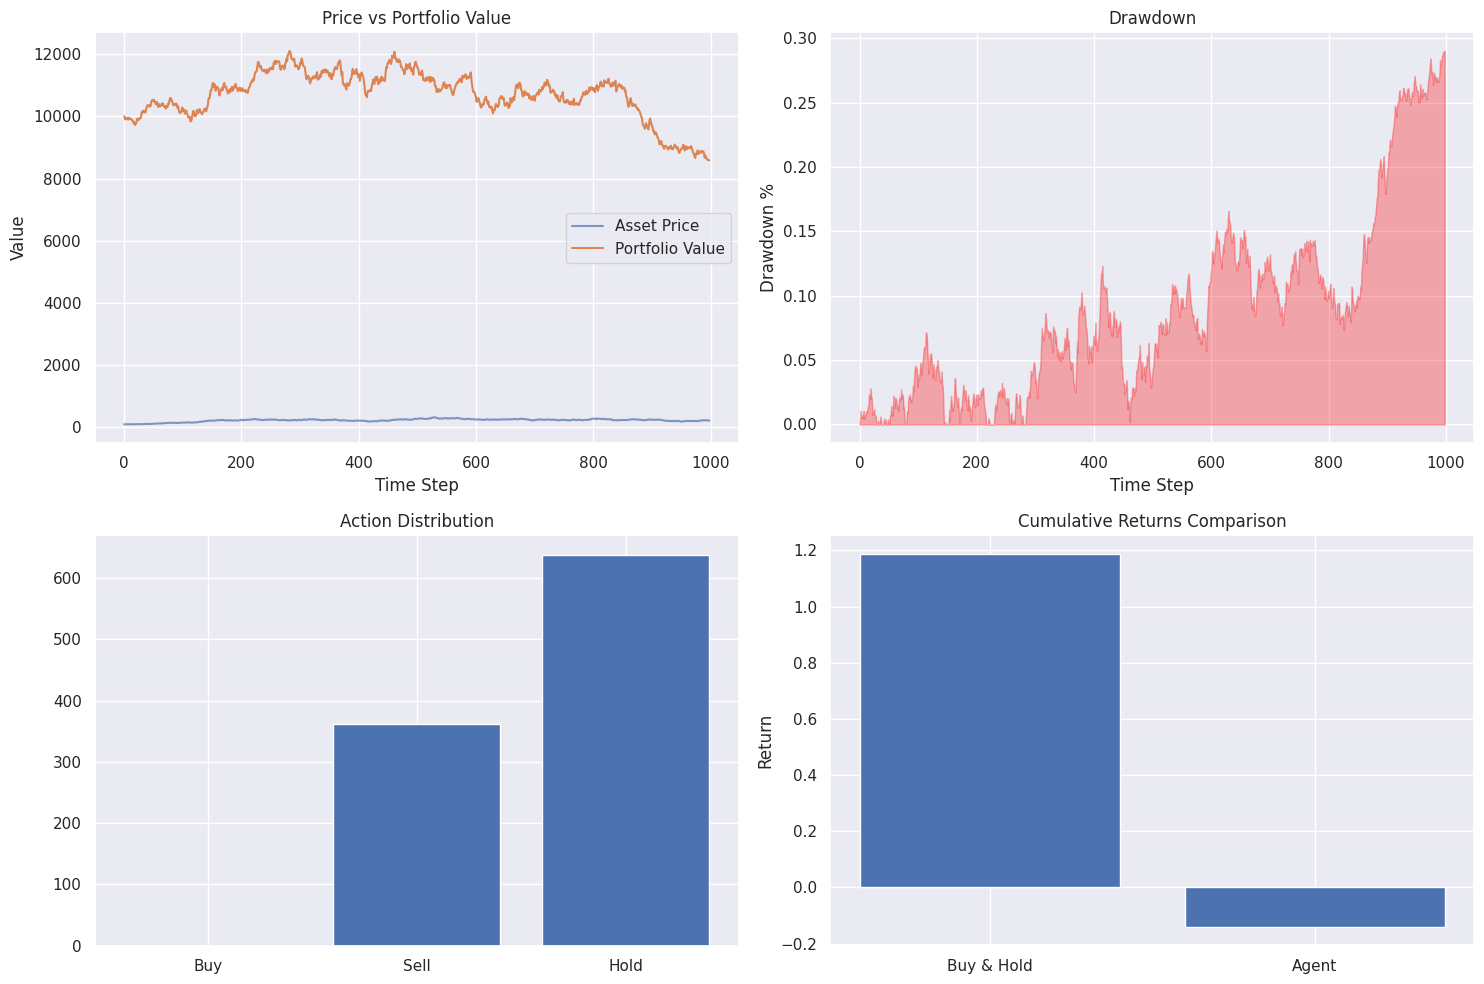


Total Trades Executed: 361
Average Trade Size: $722.29


In [36]:
# Usage Example:
# Assuming you have:
# - trained_agent: Your trained DQNAgent instance
# - test_states: Unseen market data generated with generate_state_data()

test_states=generate_state_data(num_steps=1000)

# 1. Run evaluation
portfolio_values, actions_taken, metrics, trades = evaluate_agent(agent, test_states)

# 2. Print metrics
print("\nPerformance Metrics:")
print(f"Cumulative Return: {metrics['cumulative_return']:.2%}")
print(f"Annualized Return: {metrics['annualized_return']:.2%}")
print(f"Sharpe Ratio: {metrics['sharpe_ratio']:.2f}")
print(f"Max Drawdown: {metrics['max_drawdown']:.2f}")
print(f"Win Rate: {metrics['win_rate']:.2%}")
print("\nAction Distribution:")
print(f"Buy: {metrics['action_distribution']['buy']:.2%}")
print(f"Sell: {metrics['action_distribution']['sell']:.2%}")
print(f"Hold: {metrics['action_distribution']['hold']:.2%}")

# 3. Plot results
plot_performance(test_states, portfolio_values, actions_taken)

# 4. Optional: Analyze individual trades
print(f"\nTotal Trades Executed: {len(trades)}")
if trades:
    avg_trade_size = np.mean([t['value'] for t in trades])
    print(f"Average Trade Size: ${avg_trade_size:.2f}")

# Module 2.1: Market Data Collection and Preparation 
Collect and preprocess historical market data for a portfolio of assets. Clean the data, remove inconsistencies, and fill in missing values. Create a dataset that can be used for training and evaluating your DRL trading agent.
Give a short descriptive analysis of the data (e.g. histogram of returns, summary statistics)

# Module 2.2: Benchmark Policy Design

You will design at least one benchmark policy. Naturally, the higher the quality of the benchmark, the better you can evaluate the performance of the RL algorithm.

* Create one or more benchmark policies (e.g., a rule-based trading heuristic). You might opt for extremely simple baseline heuristics (single decision rule), but advanced solutions are assessed positively.
* Explain the decision rules you incorporate and how they anticipate the future.
* You can use this benchmark to evaluate the quality of the RL algorithms you design from here on.
* Note you can define multiple benchmarks. Simple decision rules offer a sanity check and a lower bound, more advanced heuristics may be competitive with RL.

# Module 3.1: RL Algorithms Assessment
Critically assess why dynamic programming and tabular Q-learning/SARSA would struggle to provide policies for the problem at hand. Explain what modifications would be needed for these methods to solve the problem, and what impact these modifications would have on the solution.

# Module 3.2: DRL Algorithm Selection and Implementation
Select a suitable DRL algorithm for your trading agent, taking into account the state representation, action space, and non-stationary nature of financial markets. Implement the chosen algorithm using a deep learning framework like TensorFlow or PyTorch.

# Module 4: Reward Function Design and Agent Training

Design a reward function that encourages your trading agent to achieve high returns while managing risk effectively. Train your agent using the prepared market data, adjusting hyperparameters and reward functions as needed to improve learning.

# Module 5: Agent Evaluation and Refinement

Evaluate the performance of your trained trading agent using out-of-sample market data. Analyze its risk-adjusted performance metrics and ensure that its performance is robust and not the result of overfitting or lookahead bias. Refine the agent and iterate through the previous steps as needed to improve its performance.

# Module 6: Trading Strategy Analysis and Interpretation

Analyze the trading strategies learned by your agent and interpret its decisions in the context of market dynamics and asset characteristics. Identify any interesting patterns or insights that can be gained from the agent's behavior.

# Module 7: Reflection and key findings
Summarize your key findings and reflect on your work.
* How well does your final model perform? Can you compare performance to other policies?
* What discrepancies exist between your model and a real-world variant of your problem?
* How did you address the dimensionality challenges? 
* What computational limits did you encounter?
* What future improvement steps could be taken?

# Module 8: Bonus
Write the report using overleaf/ latex. Add all charts and follow this structure:
- Introduction
- Literature Review
(very short on existing literature on deep RL trading strategies)
- Theoretical foundations
(very short on the algo you used, likely Deep RL. No need to explain all concepts from RL again.)
- Data
(very short, the data you used, plus some summary statistics)
- Implementation
(the exact implementation you did. Be very specific here, what parameters, how many training iterations)
- Results
(outcome and interpretation of results)
- Conclusion
(summary and next steps)
- Bibliography 
- Appendix: Code (or link to github for the code)

For all group assignments and presentations, it holds that you should hand in/present your own and original work, in line with the Rules & Guidelines of the Examination Board. You have to add an “author contribution & use of AI statement” to the group assignment.

# Author contribution statement
The author contribution statement should include who did what (tasks) and what was the relative contribution of each group member to the overall contribution (percentage). Also, all group members should agree on the final version of the assignment.

## Example author contribution statement:
* Name group member 1: Wrote the introduction of the report, produced the mathematical model of Module 1, downloaded and cleaned the data, produced output statistics and wrote answers 1.1 and 2.3. She debugged the Python code to make the mathematical program work. She read the final version of the report and made final edits. [20%]
* Name group member 2: … [30%]

# AI statement
The use of AI statement should show if and how you used AI in your assignment. For this course, you are only allowed to use AI, such as ChatGPT, to spell-check or grammar check your writing. You are not allowed to use AI to provide you with (partial) answers, and in particular the questions on summarizing the literature or providing you with code.

What is not allowed (with exception of the approved use for spelling and grammar checking):
* Use of AI to assist with (group) assignments. Completing assignments should be done by yourselves according to the instructions provided, to meet the learning outcomes of the course and the master program.
* Use of AI to write (part of) a literature review. The ability to independently formulate ideas, theories, and/or research questions is an important part of the learning goals of the master program and this course.
* Use AI to find relevant literature. Also this is an essential task for you to do by yourself in order to fulfill the learning outcomes of this course and the master program.
* Use AI to assist you with writing code (e.g., Python). Again this is an essential task for you to do by yourself to reach the learning outcomes of this course and the master program.
Whenever you are unsure whether a specific use of ChatGPT or another AI tool is allowed, please contact one of the lecturers. 

## Example of AI statement: 
* We declare that no content produced by AI technology has been presented as our own work (both in reporting and coding)
* We declare that we used ChatGPT 3.5 to improve writing at the sentence level and to better express transitions between paragraphs.
Note: An extra oral assessment may be part of each assignment as a verification of the authenticity and contribution. Such an oral assessment could also be randomly assigned to a group